In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import homework2q1 as hw2

In [17]:
params = hw2.initialize(eta = 0.01, maxiter = 50)

Loaded training data of shape:  (1000, 3) <type 'numpy.ndarray'>
Loaded testing data of shape:  (1000, 3) <type 'numpy.ndarray'>


In [18]:
model = hw2.sgd(**params)
# Total loss function value in an epoch is the sum of 
# loss functions corresponding to every example

Stochastic Gradient Descent: Running epoch  0
Total training loss in this epoch:  15.1093559687
Total testing loss in this epoch:  15.4506260047
Stochastic Gradient Descent: Running epoch  1
Total training loss in this epoch:  8.70074824763
Total testing loss in this epoch:  7.88161329072
Stochastic Gradient Descent: Running epoch  2
Total training loss in this epoch:  6.61083787019
Total testing loss in this epoch:  5.65068621711
Stochastic Gradient Descent: Running epoch  3
Total training loss in this epoch:  5.61158895925
Total testing loss in this epoch:  4.40960953719
Stochastic Gradient Descent: Running epoch  4
Total training loss in this epoch:  4.85225021828
Total testing loss in this epoch:  3.6432365251
Stochastic Gradient Descent: Running epoch  5
Total training loss in this epoch:  4.43625864038
Total testing loss in this epoch:  3.18701211384
Stochastic Gradient Descent: Running epoch  6
Total training loss in this epoch:  4.12700487991
Total testing loss in this epoch:  

In [19]:
print "Testing accuracy for least test loss: ", model['testing_accuracy_with_best_test_loss']
print "Weights corresponding to best testing accuracy: "
print "W1: ", model['w'][0]
print "W2: ", model['w'][1]
print "W3: ", model['w'][2]

Testing accuracy for least test loss:  0.998
Weights corresponding to best testing accuracy: 
W1:  [[-0.03687243  0.61689754]
 [-0.95192419  0.83746718]
 [ 1.19638227 -0.91879434]]
W2:  [[ 0.46020324  1.65680387 -0.04082021]
 [-0.00171929  0.00650246  0.70025979]
 [-0.04544587  0.32997872  1.52491652]]
W3:  [[-0.85971207  0.80750756  1.052105  ]
 [ 1.15126556 -0.03120645 -0.26327571]]


In [20]:
# Note: In the following plots, we show how 
# training and testing loss changes with EPOCH.
# SGD algorithm is terminated once testing loss begins 
# to increase again

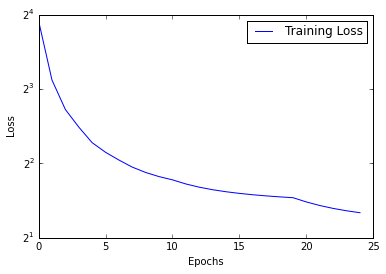

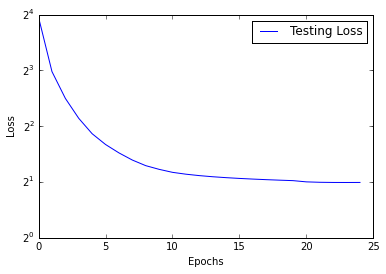

In [21]:
hw2.doplots("Loss vs Epochs (training)", model['total_training_loss_fn_value'], "Training Loss", "Epochs", "Loss", semilogy = True)
hw2.doplots("Loss vs Epochs (testing)", model['total_testing_loss_fn_value'], "Testing Loss", "Epochs", "Loss", semilogy = True)


In [22]:
# Find the f_score and other metrics
precision_recall_fscore = hw2.get_precision_recall_fscore(params['shuffle_order_testing'], params['test_data'], model['w'], params['z'], params['a'], params['y'])
print "Precision: ", precision_recall_fscore[0]
print "Recall: ", precision_recall_fscore[1]
print "F-Score: ", precision_recall_fscore[2]

Precision:  [ 0.998  0.998]
Recall:  [ 0.998  0.998]
F-Score:  [ 0.998  0.998]


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [24]:
x_train     = params['train_data'][:,:-1]
y_train     = np.array([hw2.label_to_ytrue(2, x) for x in params['train_data'][:, -1]])
x_test      = params['test_data'][:,:-1]
y_test      = np.array([hw2.label_to_ytrue(2, x) for x in params['test_data'][:, -1]])

keras_model = Sequential()
keras_model.add(Dense(3, activation='relu', use_bias = False, kernel_initializer='random_uniform', input_dim = 2))
keras_model.add(Dense(3, activation='relu', use_bias = False, kernel_initializer='random_uniform'))
keras_model.add(Dense(2, activation='softmax', use_bias = False, kernel_initializer='random_uniform'))
sgd = SGD(lr=params['eta'])
keras_model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
keras_model.fit(x_train, y_train, batch_size = 1, epochs=params['maxiter'])
score = keras_model.evaluate(x_test, y_test, batch_size=1)


Epoch 1/50
1000/1000 [==============================] - 1s - loss: 0.2500 - acc: 0.4850     
Epoch 2/50
1000/1000 [==============================] - 1s - loss: 0.2500 - acc: 0.8420     
Epoch 3/50
1000/1000 [==============================] - 1s - loss: 0.2499 - acc: 0.9570     
Epoch 4/50
1000/1000 [==============================] - 1s - loss: 0.2496 - acc: 0.9940     
Epoch 5/50
1000/1000 [==============================] - 1s - loss: 0.2471 - acc: 0.9970     
Epoch 6/50
1000/1000 [==============================] - 1s - loss: 0.1804 - acc: 0.9980     
Epoch 7/50
1000/1000 [==============================] - 1s - loss: 0.1305 - acc: 0.9980     
Epoch 8/50
1000/1000 [==============================] - 1s - loss: 0.1281 - acc: 0.9980     
Epoch 9/50
1000/1000 [==============================] - 1s - loss: 0.1274 - acc: 0.9970     
Epoch 10/50
1000/1000 [==============================] - 1s - loss: 0.1270 - acc: 0.9980     
Epoch 11/50
1000/1000 [==============================] - 1s - loss: 0

In [25]:
print score
kw = keras_model.get_weights()

[0.0011661231888813017, 0.998]


In [26]:
print "Keras W1:", kw[0]
print "Keras W2:", kw[1]
print "Keras W3:", kw[2]

Keras W1: [[-1.03383887  0.91446859  0.29889232]
 [ 0.91910839 -0.77785146 -0.31127363]]
Keras W2: [[ -4.96396646e-02   3.47100466e-01   1.33719039e+00]
 [  1.19919693e+00  -4.29622605e-02  -1.57816373e-02]
 [  4.29353684e-01  -5.24332374e-03   3.23800952e-04]]
Keras W3: [[ 0.89922833 -0.90330708]
 [-0.2071954   0.2821019 ]
 [-0.95654994  0.93394506]]


In [27]:
kwt = []
kwt.append(kw[0].T)
kwt.append(kw[1].T)
kwt.append(kw[2].T)

In [28]:
# Find the f_score and other metrics
precision_recall_fscore = hw2.get_precision_recall_fscore(params['shuffle_order_testing'], params['test_data'], kwt, params['z'], params['a'], params['y'])
print "Precision: ", precision_recall_fscore[0]
print "Recall: ", precision_recall_fscore[1]
print "F-Score: ", precision_recall_fscore[2]

Precision:  [ 0.998  0.998]
Recall:  [ 0.998  0.998]
F-Score:  [ 0.998  0.998]
